In [1]:
import glob
import json
import matplotlib.pyplot as plt

In [2]:
root_dir = "/home/rishabhgupta/mvcnn_pytorch/modelnet40_images_new_12x/*/train"
set_ = root_dir.split('/')[-1]
parent_dir = root_dir.rsplit('/',2)[0]

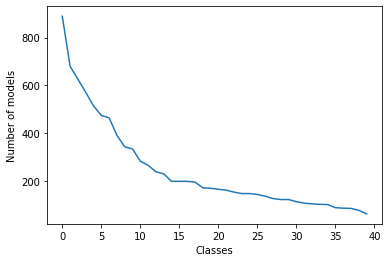

In [4]:
classnames = !ls {parent_dir}
all_files = []
num_models = []
for i in range(len(classnames)):
    files = sorted(glob.glob(parent_dir+'/'+classnames[i]+'/'+set_+'/*.png'))
    num = len(files)//12
    all_files.append(files)
    num_models.append(num)
    
plt.plot(sorted(num_models)[::-1])
plt.xlabel('Classes')
plt.ylabel('Number of models')
plt.show()
    
classnames = [shape for _,shape in sorted(zip(num_models,classnames))][::-1]
all_files = [files for _,files in sorted(zip(num_models,all_files))][::-1]


In [19]:
base = {'label_names':[],'image_names':[],'image_labels':[]}
val = {'label_names':[],'image_names':[],'image_labels':[]}
novel = {'label_names':[],'image_names':[],'image_labels':[]}
for i in range(len(classnames)):
    if i % 5 == 0:
        novel['label_names'].append(classnames[i])
        for file in all_files[i]:
            novel['image_names'].append(file)
            novel['image_labels'].append(i)
    elif i % 5 == 1:
        val['label_names'].append(classnames[i])
        for file in all_files[i]:
            val['image_names'].append(file)
            val['image_labels'].append(i)
    else:
        base['label_names'].append(classnames[i])
        for file in all_files[i]:
            base['image_names'].append(file)
            base['image_labels'].append(i)

with open('/home/rishabhgupta/mvcnn_fewshot/filelists/ModelNet/base.json','w') as f:
    json.dump(base, f, indent=2)
    f.close()
    
with open('/home/rishabhgupta/mvcnn_fewshot/filelists/ModelNet/val.json','w') as f:
    json.dump(val, f, indent=2)
    f.close()

with open('/home/rishabhgupta/mvcnn_fewshot/filelists/ModelNet/novel.json','w') as f:
    json.dump(novel, f, indent=2)
    f.close()